In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm

import pywt
from pywt import wavedec

plt.rcParams["figure.figsize"] = (8, 4)
plt.rcParams.update({'font.size': 12})

In [2]:
df= pd.read_csv('raw_data.csv', index_col = ['moment'], parse_dates = ['moment'])
df.head()

,SM_Exgauster\[0:0],SM_Exgauster\[0:1],SM_Exgauster\[0:2],SM_Exgauster\[0:3],SM_Exgauster\[0:4],SM_Exgauster\[0:5],SM_Exgauster\[0:6],SM_Exgauster\[0:7],SM_Exgauster\[0:8],SM_Exgauster\[0:9],...,SM_Exgauster\[6:2],SM_Exgauster\[6.0],SM_Exgauster\[7:0],SM_Exgauster\[7:1],SM_Exgauster\[7:2],SM_Exgauster\[7.0],SM_Exgauster\[8:0],SM_Exgauster\[8:1],SM_Exgauster\[8:2],SM_Exgauster\[8.0]
moment,,,,,,,,,,,,,,,,,,,,,
2023-01-25 06:32:25.125007,1.284722,1.689815,0.964621,1.614583,2.089120,1.440972,2.001208,1.539352,1.494385,1.765046,...,2.600589,1.0,625.000000,138.372635,3.098138,1.0,0.723379,15.567306,-5.605194e-45,0.0
2023-01-25 06:33:25.125007,1.267361,1.689815,0.962173,1.626158,2.065972,1.417824,1.997886,1.556713,1.482208,1.741898,...,2.594604,1.0,617.404541,138.209290,3.100688,1.0,0.723379,15.139420,-5.605194e-45,0.0
2023-01-25 06:34:25.125007,1.296296,1.701389,0.971429,1.620370,2.083333,1.429398,1.990758,1.527778,1.489869,1.712963,...,2.591550,1.0,618.438721,138.295776,3.107095,1.0,0.723379,15.138195,-5.605194e-45,0.0
2023-01-25 06:35:25.125007,1.255787,1.689815,0.971007,1.614583,2.077546,1.429398,2.019292,1.516204,1.489961,1.712963,...,2.686367,1.0,622.107178,138.080093,3.112228,1.0,0.723379,15.138195,-5.605194e-45,0.0
2023-01-25 06:36:25.125007,1.302083,1.701389,0.966538,1.620370,2.112268,1.452546,1.981981,1.562500,1.494923,1.770833,...,2.692058,1.0,617.766602,138.354065,3.106137,1.0,0.723379,15.138195,-5.605194e-45,0.0


In [3]:
vibr_v8 = 'SM_Exgauster\[3:10]'
vibr_H8 = 'SM_Exgauster\[3:9]'
vibr_v7= 'SM_Exgauster\[3:7]'
vibr_H7='SM_Exgauster\[3:6]'
temp8='SM_Exgauster\[3:34]'
temp7='SM_Exgauster\[3:33]'

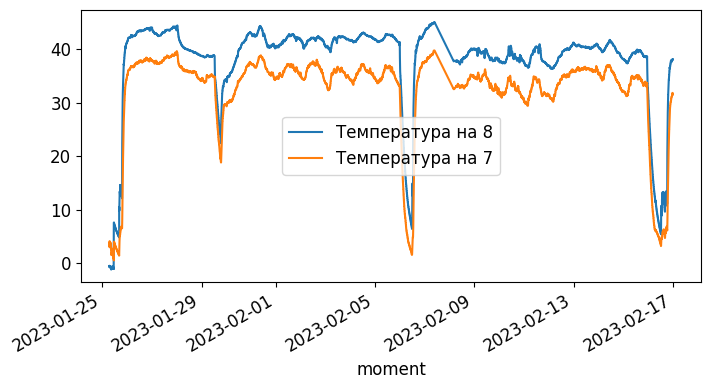

In [4]:
df[temp8].plot()
df[temp7].plot()
plt.legend(['Температура на 8', 'Температура на 7'])

<Axes: xlabel='moment', ylabel='amplitude'>

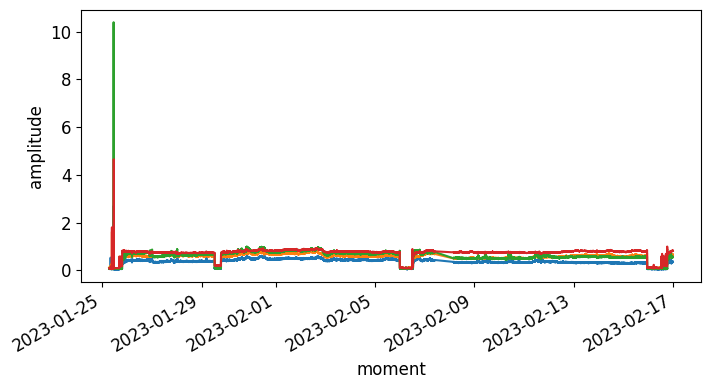

In [5]:
df[vibr_v8].plot(ylabel='amplitude')
df[vibr_v7].plot()
df[vibr_H8].plot()
df[vibr_H7].plot()

In [6]:
df_for_plot = df[df.index <'01.26.2023']

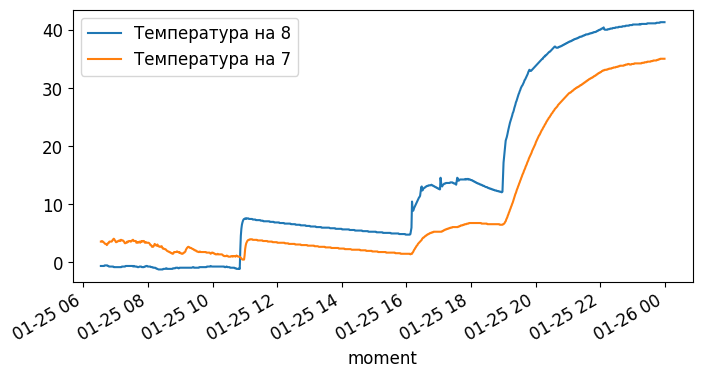

In [7]:
df_for_plot[temp8].plot()
df_for_plot[temp7].plot()
plt.legend(['Температура на 8', 'Температура на 7'])

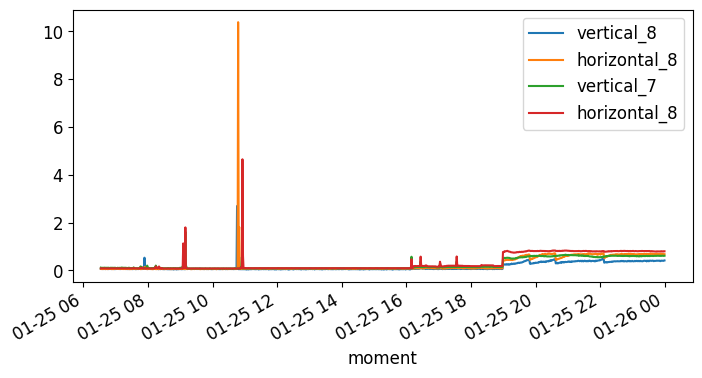

In [8]:
df_for_plot[vibr_v8 ].plot()
df_for_plot[vibr_H8].plot()
df_for_plot[vibr_v7].plot()
df_for_plot[vibr_H7].plot()
plt.legend(['vertical_8', 'horizontal_8', 'vertical_7', 'horizontal_8'])

Расчет амплитуды

In [9]:
def get_amplitude(y):
    """
    расчет амплитуды
    
    """
    
    np_fft = np.fft.fft(y)
    n_samples = len(np_fft)
    amplitudes = 2 / n_samples * np.abs(np_fft) 
    return max(amplitudes)

In [10]:
def create_features(df, col_name, col_output_name=['amplitude']):
    result = []
#     calc_std = []
    v = []
    for i in df[col_name].index:
        v.append(df.loc[i, col_name].values)
        if len(v) >= 10:
#         print(v, '\n')
            result.append(get_amplitude(v))
#             calc_std.append(np.std(v))
            v = []
            
    return pd.DataFrame(result, columns=col_output_name)

In [11]:
df_from_v8 = create_features(df, [vibr_v8])
df_from_h8 = create_features(df, [vibr_H8], ['amp_h8'])
df_from_v7 = create_features(df, [vibr_v7], ['amp_v7'])
df_from_h7 = create_features(df, [vibr_H7], ['amp_h7'])

In [12]:
df2=pd.concat([df_from_v8, df_from_h8,df_from_v7, df_from_h7], axis=1)
df2

,amplitude,amp_h8,amp_v7,amp_h7
0,0.012731,0.013903,0.023148,0.017361
1,0.012731,0.014415,0.023148,0.017361
2,0.012731,0.014944,0.021991,0.017361
3,0.013889,0.015870,0.024306,0.018107
4,0.016204,0.013385,0.021991,0.017361
...,...,...,...,...
3094,0.069444,0.113383,0.128472,0.163500
3095,0.071759,0.114456,0.133102,0.164651
3096,0.075231,0.116536,0.134259,0.165767
3097,0.071759,0.115570,0.134259,0.166233


<Axes: >

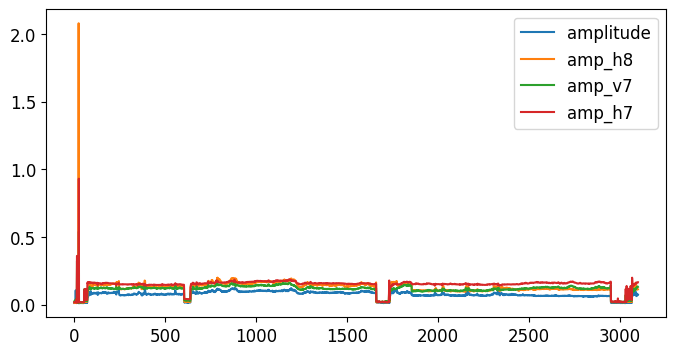

In [13]:
df2.plot()

График исходные и графики амплитуды получились одинаковые. Применим для предсказания разложения Хаара.

### Применим разложения Хаара к вертикальной вибрации

In [14]:
cA, cD = wavedec(df[vibr_v8].values, 'haar', mode='zero', level=1)

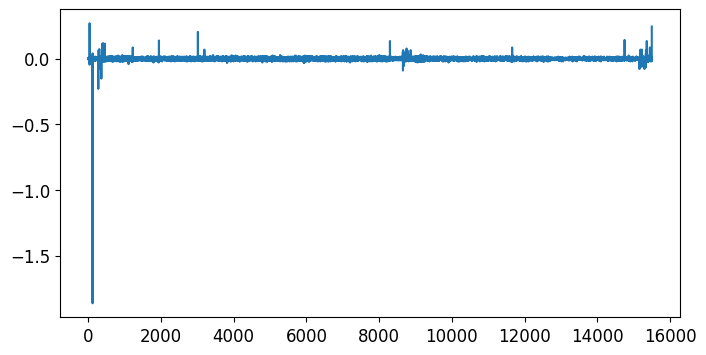

In [15]:
plt.plot(cD)

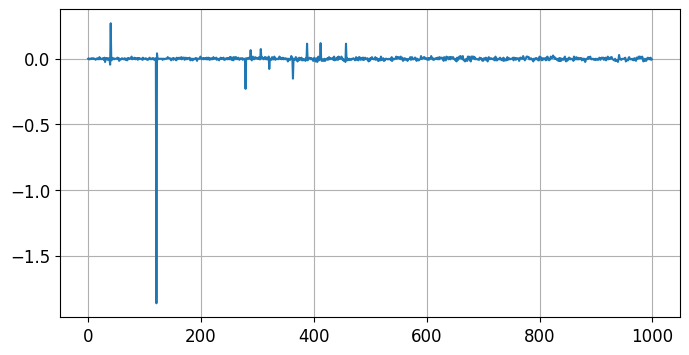

In [16]:
plt.grid()
plt.plot(cD[0:1000])

### Построение модели предсказания

In [17]:
from sklearn.linear_model import  Ridge

In [18]:
# проходим скользящим окном и выбираем максимальные значения cD

max_r = np.lib.stride_tricks.sliding_window_view(np.abs(cD), 20).max(axis=1)

# для построения выбираем 0:5000 значений cD
# на 5000:6000 будем как бы "тестировать"
x_train = max_r[0:1000]

In [19]:
x_train = x_train[~np.isnan(x_train)]

In [20]:
time = np.arange(0, len(x_train), 1)
model = Ridge() # линейное уравнение, но с коэффициентом регуляризации
model.fit(time.reshape(-1, 1), x_train)

Ridge()

In [21]:
x_for_plot = np.arange(0, 1000)
predict = model.predict(x_for_plot.reshape(-1, 1))

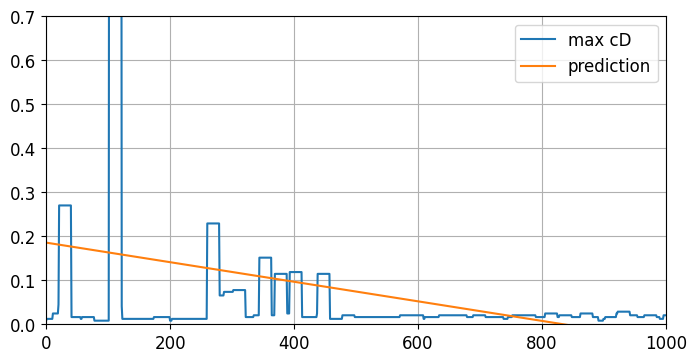

In [22]:
plt.grid()
plt.plot(max_r, label='max cD')
plt.plot(x_for_plot, predict, label='prediction')
plt.ylim([0, 0.7])
plt.xlim([0, 1000])

plt.legend()